In [1]:
import pandas as pd

In [2]:
books = pd.read_csv('Preprocessed_data.csv', index_col=False).reset_index(drop=True)

# Let's drop columns we will not need 
df = books[['location', 'user_id', 'age', 'isbn', 'rating', 'book_title', 'book_author', 'year_of_publication', 'publisher', 
               'img_m', 'Summary', 'Category']]
df

,location,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_m,Summary,Category
0,"stockton, california, usa",2,18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,['Social Science']
1,"timmins, ontario, canada",8,34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",['Actresses']
2,"ottawa, ontario, canada",11400,49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",['Actresses']
3,"n/a, n/a, n/a",11676,34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",['Actresses']
4,"sudbury, ontario, canada",41385,34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",['Actresses']
...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,"dallas, texas, usa",278851,33.0000,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon & Schuster,http://images.amazon.com/images/P/0743203763.0...,Golf lovers will revel in this collection of t...,['Humor']
1031171,"dallas, texas, usa",278851,33.0000,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,A daring twist on the travel-adventure genre t...,['Nature']
1031172,"dallas, texas, usa",278851,33.0000,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,9,9
1031173,"dallas, texas, usa",278851,33.0000,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,These hilarious stories by the creator of publ...,['Fiction']


In [3]:
# Let's check if we do not have any data missing
print('Null values: {}'.format(sum(df.isnull().any())))
# Or if there are not duplicates
print('duplicates: {}'.format(sum(df.duplicated())))

Null values: 0
duplicates: 0


In [4]:
# I am going to drop the 0 ratings as I am pretty sure they are supposed to be non ratings
df = df[df['rating'] != 0]

In [5]:
print('Data Summary:')
print('Number of ratings: {}'.format(len(df)))
print('Number of users: {}'.format(len(df['user_id'].unique())))
print('Number of books: {}'.format(len(df['book_title'].unique())))
print('Mean rating: {}'.format(round(df['rating'].mean(),2)))
print('Average number of ratings given by user: {}'.format(pd.DataFrame(df.groupby('user_id')['rating'].count()).mean()[0]))

Data Summary:
Number of ratings: 383852
Number of users: 68092
Number of books: 135573
Mean rating: 7.63
Average number of ratings given by user: 5.6372554778828645


In [6]:
df['rating'].describe()

count    383852.000000
mean          7.626710
std           1.841331
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: rating, dtype: float64

In [7]:
# Some EDA
ratings = pd.DataFrame(df.groupby('book_title')['rating'].mean()).sort_values(ascending=False, by='rating')
ratings['num of ratings'] = pd.DataFrame(df.groupby('book_title')['rating'].count())
ratings.sort_values('num of ratings', ascending=False)[:10000]

,rating,num of ratings
book_title,,
The Lovely Bones: A Novel,8.185290,707
Wild Animus,4.390706,581
The Da Vinci Code,8.439271,494
The Secret Life of Bees,8.477833,406
The Nanny Diaries: A Novel,7.437659,393
...,...,...
Boundaries,7.666667,6
Late Bloomer,7.666667,6
Double Sin and Other Stories,7.666667,6


<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

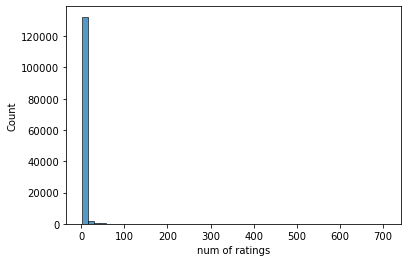

In [8]:
import seaborn as sns

sns.histplot(ratings, x='num of ratings', bins=50)

<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

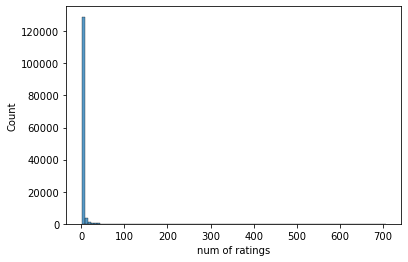

In [9]:
import seaborn as sns
# That is a very odd distribution, take into account only those with 100 ratings or more
sns.histplot(ratings, x='num of ratings', bins=100)

<AxesSubplot:xlabel='rating', ylabel='Count'>

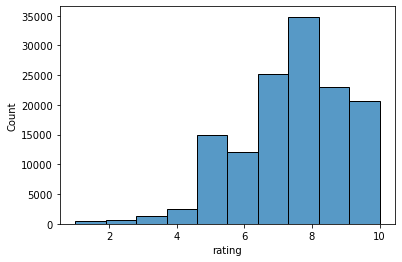

In [10]:
sns.histplot(ratings, x='rating', bins=10)

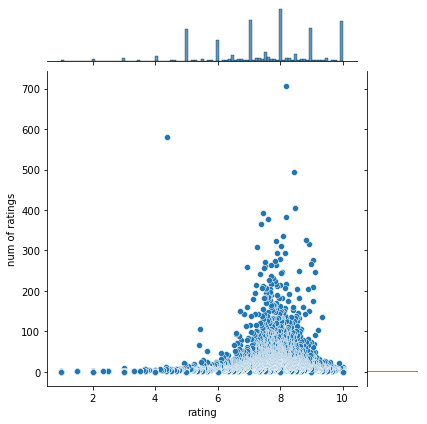

In [11]:
sns.jointplot(x='rating', y='num of ratings', data=ratings)

In [12]:
# Best and least rated books with 40 or more ratings
ratings[ratings['num of ratings'] > 40].sort_values(by='rating', ascending=False)

,rating,num of ratings
book_title,,
"The Two Towers (The Lord of the Rings, Part 2)",9.330882,136
"The Return of the King (The Lord of the Rings, Part 3)",9.213592,103
Harry Potter and the Goblet of Fire (Book 4),9.125506,247
The Hobbit,9.120000,50
The Little Prince,9.111111,90
...,...,...
Violin,6.106383,47
4 Blondes,5.653846,52
Isle of Dogs,5.433962,106


In [13]:
# Books with largest number of ratings
ratings.sort_values(by=['num of ratings', 'rating'], ascending=False)

,rating,num of ratings
book_title,,
The Lovely Bones: A Novel,8.185290,707
Wild Animus,4.390706,581
The Da Vinci Code,8.439271,494
The Secret Life of Bees,8.477833,406
The Nanny Diaries: A Novel,7.437659,393
...,...,...
The Value of Family : A Blueprint for the 21st Century,1.000000,1
Threshold (Book 2 of the Fire of Heaven Trilogy),1.000000,1
Managing Management Time: Who's Got the Monkey?,1.000000,1


In [14]:
# Let's get the books that have more than 10 ratings
over_10 = ratings[ratings['num of ratings'] > 10]
over_10

,rating,num of ratings
book_title,,
Postmarked Yesteryear: 30 Rare Holiday Postcards,10.000000,11
Dilbert: A Book of Postcards,9.923077,13
Harry Potter and the Chamber of Secrets Postcard Book,9.869565,23
Route 66 Postcards: Greetings from the Mother Road,9.727273,11
"The Return of the King (The Lord of The Rings, Part 3)",9.625000,16
...,...,...
Killing Time: A Novel of the Future,5.066667,15
Coal: A Human History,4.947368,19
The Sexual Life of Catherine M.,4.913043,23


In [15]:
# Aplly it to the main df
def get_num_of_ratings(bookname):
    if bookname in over_10.index:
        num_of_ratings = over_10[over_10.index == bookname]['num of ratings']
        return num_of_ratings[0]
    
df['num of ratings'] = df['book_title'].apply(get_num_of_ratings)

C:\Users\User\AppData\Local\Temp/ipykernel_21864/2745085126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num of ratings'] = df['book_title'].apply(get_num_of_ratings)


In [16]:
# Drop the ratings for the books that have less than 10 ratings
# The dataset is pretty have so it would be an advantage for model building
dff = df.dropna()
dff.head(2)

,location,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_m,Summary,Category,num of ratings
31,"n/a, n/a, n/a",11676,34.7439,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,A Chinese immigrant who is convinced she is dy...,['Fiction'],116.0
32,"knoxville, tennessee, usa",29526,26.0000,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,A Chinese immigrant who is convinced she is dy...,['Fiction'],116.0


In [17]:
dff['book_title'].nunique()

5044

In [18]:
len(over_10)

5044

In [19]:
# Lets reduce the dataset to the most users that are the most active --> top 2000 with most number of ratings given
users = pd.DataFrame(dff.groupby('user_id')['rating'].mean()).sort_values(ascending=False, by='rating')
users['num of ratings'] = pd.DataFrame(dff.groupby('user_id')['rating'].count())
users.sort_values('num of ratings', ascending=False)[:2000]

top_2000 = users.sort_values('num of ratings', ascending=False)[:2000]
top_2000

,rating,num of ratings
user_id,,
11676,7.615701,2191
98391,8.799127,458
153662,9.064690,371
16795,7.682320,362
95359,7.931818,308
...,...,...
147420,8.307692,13
201697,8.307692,13
137137,9.307692,13


In [20]:
def get_num_of_ratings_user(user_id):

    if user_id in top_2000.index:
        num_of_ratings_user = top_2000[top_2000.index == user_id]['num of ratings']
        return num_of_ratings_user.values[0]
    
dff['num of ratings user'] = dff['user_id'].apply(get_num_of_ratings_user)

C:\Users\User\AppData\Local\Temp/ipykernel_21864/113909040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['num of ratings user'] = dff['user_id'].apply(get_num_of_ratings_user)


In [21]:
# rest users
dff = dff.dropna()


In [28]:
# It turns out that some books have more than one publication
# Some of the publications have different summary, which turns out to be a problem in model building
# I will map the summary of each movie so it is the same for each publication
over_2publications = pd.DataFrame(dff.groupby(['book_title'])['Summary'].nunique())
over_2publications = over_2publications[over_2publications['Summary'] != 1]

def change_summ(title):
    if title in over_2publications.index:
        id_of_longest_summary = dff[dff['book_title'] == title]['Summary'].apply(lambda x: len(x)).idxmax()
        return dff.loc[id_of_longest_summary]['Summary']
    

dff['Summary'] = dff['book_title'].apply(change_summ)

In [38]:
# rest users
dff = dff.dropna()

# Lets make sure it works
pd.DataFrame(dff.groupby(['book_title'])['Summary'].nunique()).sort_values('Summary')

,Summary
book_title,
'Salem's Lot,1
Take the Cannoli : Stories From the New World,1
TIME AND AGAIN,1
Sybil,1
Sword of Shannara,1
...,...
Hotel of the Saints,1
Hot Shot,1
Hot Ice,1


In [51]:
# There are 2 books summaries with only just word
dff[dff['Summary'].apply(lambda x: True if len(x) < 10 else False)].head(2)

,location,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_m,Summary,Category,num of ratings,num of ratings user
23726,"cary, north carolina, usa",15408,34.0,0517122707,7,A Confederacy of Dunces,John Kennedy Toole,1995.0,Outlet Books Company,http://images.amazon.com/images/P/0517122707.0...,9,9,34.0,36.0
23744,"new york, new york, usa",69078,42.0,0517122707,9,A Confederacy of Dunces,John Kennedy Toole,1995.0,Outlet Books Company,http://images.amazon.com/images/P/0517122707.0...,9,9,34.0,139.0


In [52]:
dff = dff[dff['Summary'].apply(lambda x: True if len(x) > 10 else False)]

In [53]:
print('Data Summary:')
print('Number of ratings: {}'.format(len(dff)))
print('Number of users: {}'.format(len(dff['user_id'].unique())))
print('Number of books: {}'.format(len(dff['book_title'].unique())))
print('Mean rating: {}'.format(round(dff['rating'].mean(),2)))
print('Mean number of ratings per book: {}'.format(round(dff['num of ratings'].mean(),2)))
print('Average number of ratings given by user: {}'.format(pd.DataFrame(dff.groupby('user_id')['rating'].count()).mean()[0]))

Data Summary:
Number of ratings: 34500
Number of users: 1999
Number of books: 2000
Mean rating: 7.9
Mean number of ratings per book: 85.65
Average number of ratings given by user: 17.25862931465733


In [54]:
dff.to_csv('ratings_with_features.csv', index=False)

In [55]:
dff = pd.read_csv('ratings_with_features.csv')

In [56]:
dff

,location,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_m,Summary,Category,num of ratings,num of ratings user
0,"n/a, n/a, n/a",11676,34.7439,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,A Chinese immigrant who is convinced she is dy...,['Fiction'],116.0,2191.0
1,"knoxville, tennessee, usa",29526,26.0000,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,A Chinese immigrant who is convinced she is dy...,['Fiction'],116.0,62.0
2,"san antonio, texas, usa",46398,37.0000,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,A Chinese immigrant who is convinced she is dy...,['Fiction'],116.0,132.0
3,"homer, alaska, usa",148712,34.7439,0399135782,10,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,A Chinese immigrant who is convinced she is dy...,['Fiction'],116.0,19.0
4,"colorado springs, colorado, usa",230522,52.0000,0399135782,7,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,A Chinese immigrant who is convinced she is dy...,['Fiction'],116.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,"reston, virginia, usa",266865,33.0000,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973.0,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,There are many voices in this novel: children&...,9,265.0,48.0
34496,"seattle, washington, usa",269566,9.0000,0688210767,7,Beezus and Ramona,Beverly Cleary,1955.0,HarperCollins,http://images.amazon.com/images/P/0688210767.0...,It is not that Ramona deliberately sets out to...,['Juvenile Fiction'],15.0,45.0
34497,"west bend, wisconsin, usa",270820,52.0000,0606298347,7,The Vision,Dean R. Koontz,1986.0,Turtleback Books Distributed by Demco Media,http://images.amazon.com/images/P/0606298347.0...,Mary Bergen&#39;s remarkable clairvoyant talen...,9,23.0,49.0
34498,"gahanna/columbus, ohio, usa",274061,26.0000,1551663147,10,Fever,Elizabeth Lowell,1997.0,Mira,http://images.amazon.com/images/P/1551663147.0...,This unforgettable sequel to Like Boogie on Tu...,['Utah'],25.0,103.0
